# Exploratory Data Analysis - E-commerce Fraud Data

This notebook performs exploratory data analysis on the e-commerce transaction data (Fraud_Data.csv).


## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


## 2. Load Data


In [2]:
# Load the dataset
data_path = Path('../data/raw/Fraud_Data.csv')
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
df.head()


Dataset shape: (151112, 11)

Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

Data types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## 3. Data Overview and Basic Statistics


In [3]:
# Basic information
df.info()
print("\n" + "="*80)
print("Statistical Summary")
print("="*80)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB

Statistical Summary


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


## 4. Data Cleaning Checks


In [4]:
# Check for missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_percent
})
print("Missing Values Analysis:")
print("="*50)
print(missing_df[missing_df['Missing Count'] > 0])
if missing_df[missing_df['Missing Count'] > 0].empty:
    print("No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")

# Check data types
print("\nData Types:")
print(df.dtypes)


Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
No missing values found!



Duplicate rows: 0 (0.00%)

Data Types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


## 5. Class Distribution Analysis (Target Variable)


Class Distribution:
Legitimate (0): 136,961 (90.64%)
Fraudulent (1): 14,151 (9.36%)

Imbalance Ratio: 9.68:1


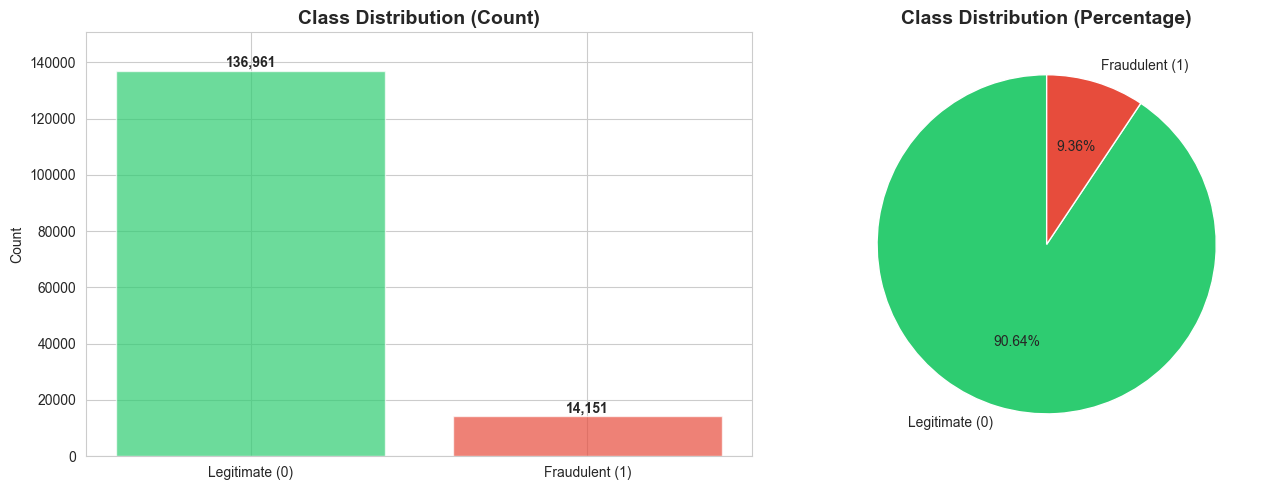

In [5]:
# Class distribution
class_counts = df['class'].value_counts()
class_percentages = df['class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print("="*50)
print(f"Legitimate (0): {class_counts[0]:,} ({class_percentages[0]:.2f}%)")
print(f"Fraudulent (1): {class_counts[1]:,} ({class_percentages[1]:.2f}%)")
print(f"\nImbalance Ratio: {class_counts[0]/class_counts[1]:.2f}:1")

# Visualize class imbalance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['Legitimate (0)', 'Fraudulent (1)'], class_counts.values, 
            color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, max(class_counts.values) * 1.1)
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + max(class_counts.values)*0.01, f'{v:,}', 
                ha='center', fontweight='bold')

# Pie chart
axes[1].pie(class_counts.values, labels=['Legitimate (0)', 'Fraudulent (1)'],
            autopct='%1.2f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


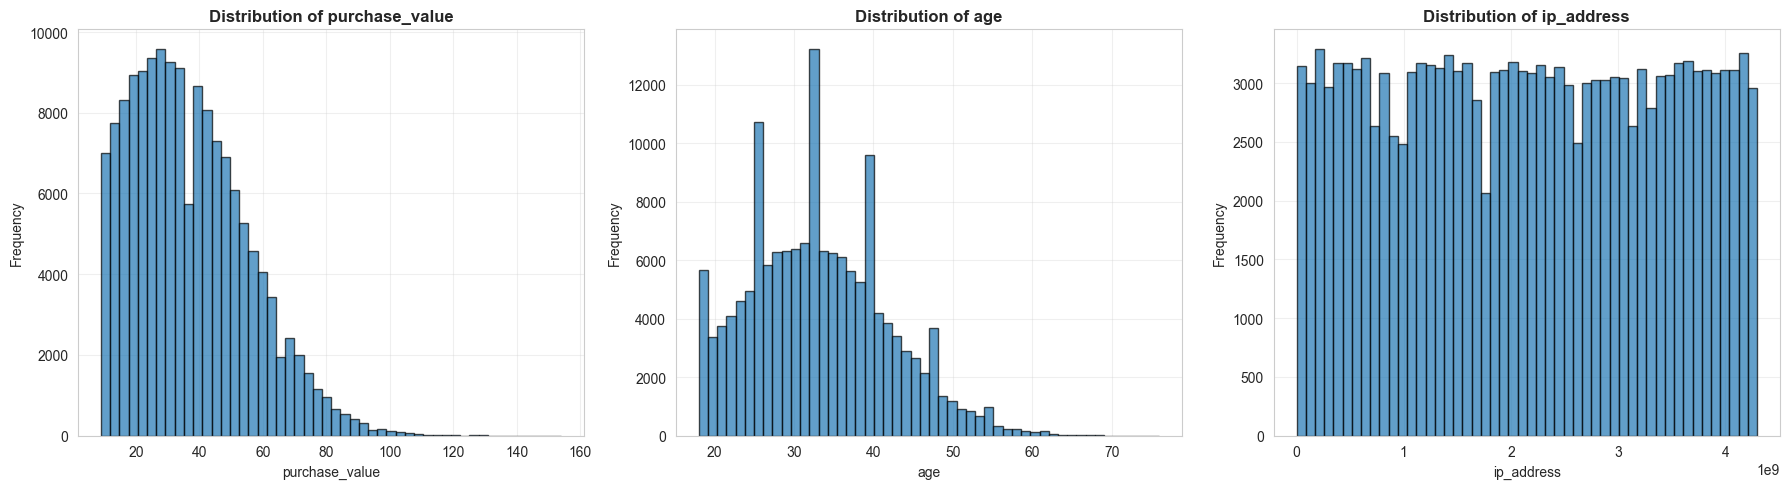


Statistical Summary for Numerical Features:
       purchase_value            age    ip_address
count   151112.000000  151112.000000  1.511120e+05
mean        36.935372      33.140704  2.152145e+09
std         18.322762       8.617733  1.248497e+09
min          9.000000      18.000000  5.209350e+04
25%         22.000000      27.000000  1.085934e+09
50%         35.000000      33.000000  2.154770e+09
75%         49.000000      39.000000  3.243258e+09
max        154.000000      76.000000  4.294850e+09


In [6]:
# Convert time columns to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Numerical features
numerical_features = ['purchase_value', 'age', 'ip_address']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(df[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary for numerical features
print("\nStatistical Summary for Numerical Features:")
print("="*60)
print(df[numerical_features].describe())


## 7. Univariate Analysis - Categorical Features


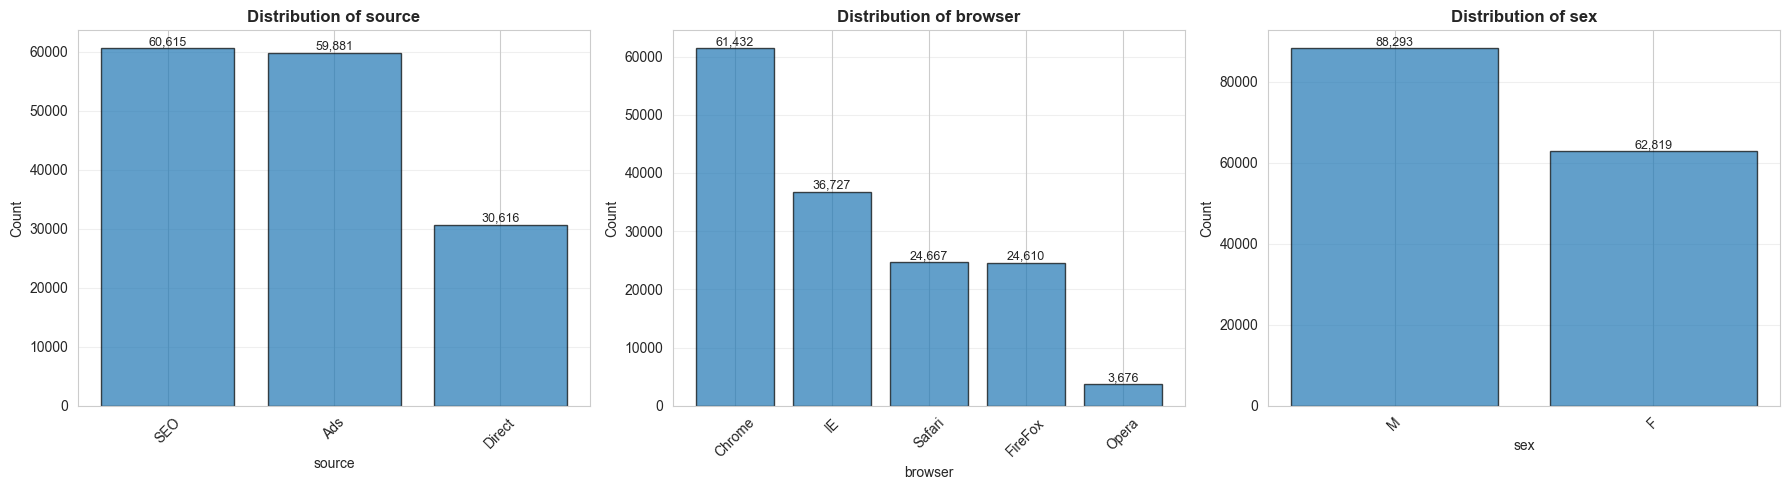


source Distribution:
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64


browser Distribution:
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64


sex Distribution:
sex
M    88293
F    62819
Name: count, dtype: int64



In [7]:
# Categorical features
categorical_features = ['source', 'browser', 'sex']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    axes[idx].bar(value_counts.index, value_counts.values, alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add count labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + max(value_counts.values)*0.01, f'{v:,}', 
                      ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Value counts for categorical features
for feature in categorical_features:
    print(f"\n{feature} Distribution:")
    print("="*40)
    print(df[feature].value_counts())
    print()


## 8. Bivariate Analysis - Features vs Target


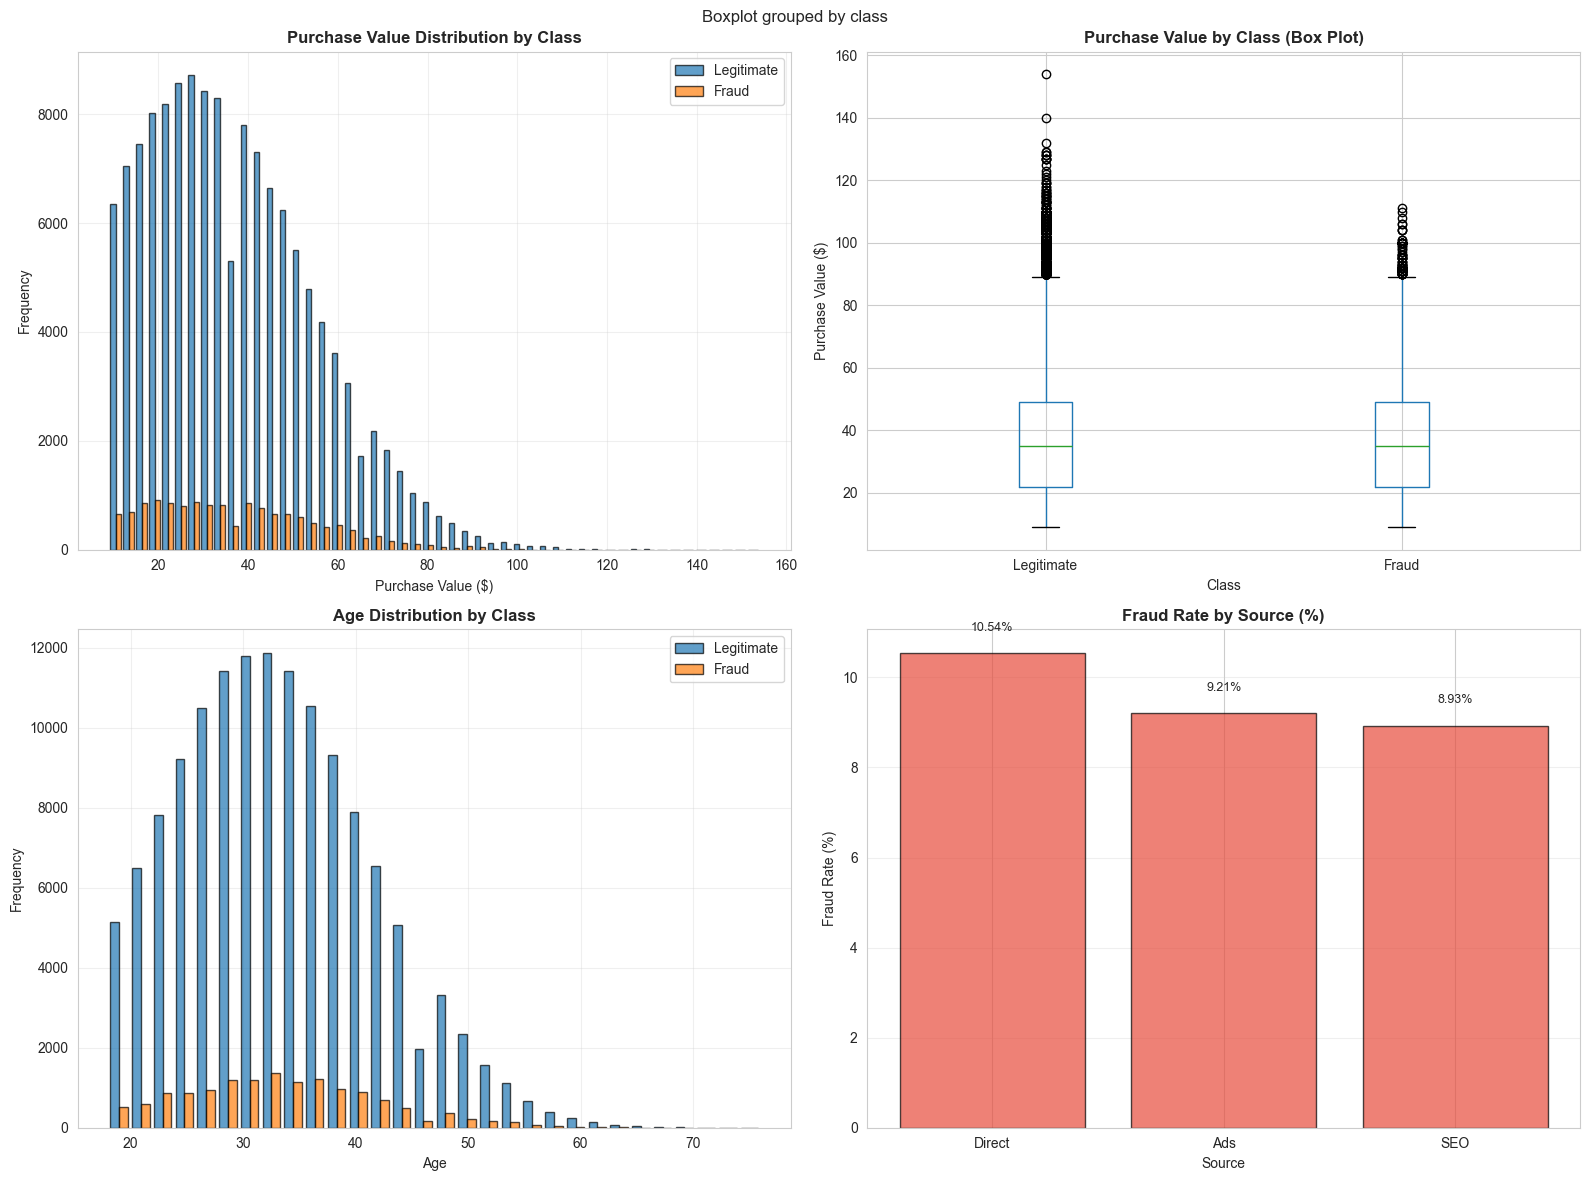

Summary Statistics by Class:

Purchase Value:
          count       mean        std  min   25%   50%   75%    max
class                                                              
0      136961.0  36.929418  18.315064  9.0  22.0  35.0  49.0  154.0
1       14151.0  36.993004  18.397654  9.0  22.0  35.0  49.0  111.0

Age:
          count       mean       std   min   25%   50%   75%   max
class                                                             
0      136961.0  33.122356  8.622678  18.0  27.0  33.0  39.0  76.0
1       14151.0  33.318281  8.568001  18.0  27.0  33.0  39.0  68.0


In [8]:
# Purchase value by class
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Purchase value distribution by class
fraud_purchase = df[df['class'] == 1]['purchase_value']
legit_purchase = df[df['class'] == 0]['purchase_value']

axes[0, 0].hist([legit_purchase, fraud_purchase], bins=50, 
                label=['Legitimate', 'Fraud'], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Purchase Value Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Purchase Value ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot for purchase value
df.boxplot(column='purchase_value', by='class', ax=axes[0, 1])
axes[0, 1].set_title('Purchase Value by Class (Box Plot)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylabel('Purchase Value ($)')
axes[0, 1].set_xticklabels(['Legitimate', 'Fraud'])

# Age distribution by class
fraud_age = df[df['class'] == 1]['age']
legit_age = df[df['class'] == 0]['age']

axes[1, 0].hist([legit_age, fraud_age], bins=30, 
               label=['Legitimate', 'Fraud'], alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Age Distribution by Class', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Fraud rate by source
fraud_by_source = df.groupby('source')['class'].agg(['count', 'sum', 'mean']).reset_index()
fraud_by_source.columns = ['source', 'total', 'fraud_count', 'fraud_rate']
fraud_by_source = fraud_by_source.sort_values('fraud_rate', ascending=False)

axes[1, 1].bar(fraud_by_source['source'], fraud_by_source['fraud_rate']*100, 
               alpha=0.7, edgecolor='black', color='#e74c3c')
axes[1, 1].set_title('Fraud Rate by Source (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Source')
axes[1, 1].set_ylabel('Fraud Rate (%)')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(fraud_by_source['fraud_rate']*100):
    axes[1, 1].text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Summary statistics by class
print("Summary Statistics by Class:")
print("="*60)
print("\nPurchase Value:")
print(df.groupby('class')['purchase_value'].describe())
print("\nAge:")
print(df.groupby('class')['age'].describe())


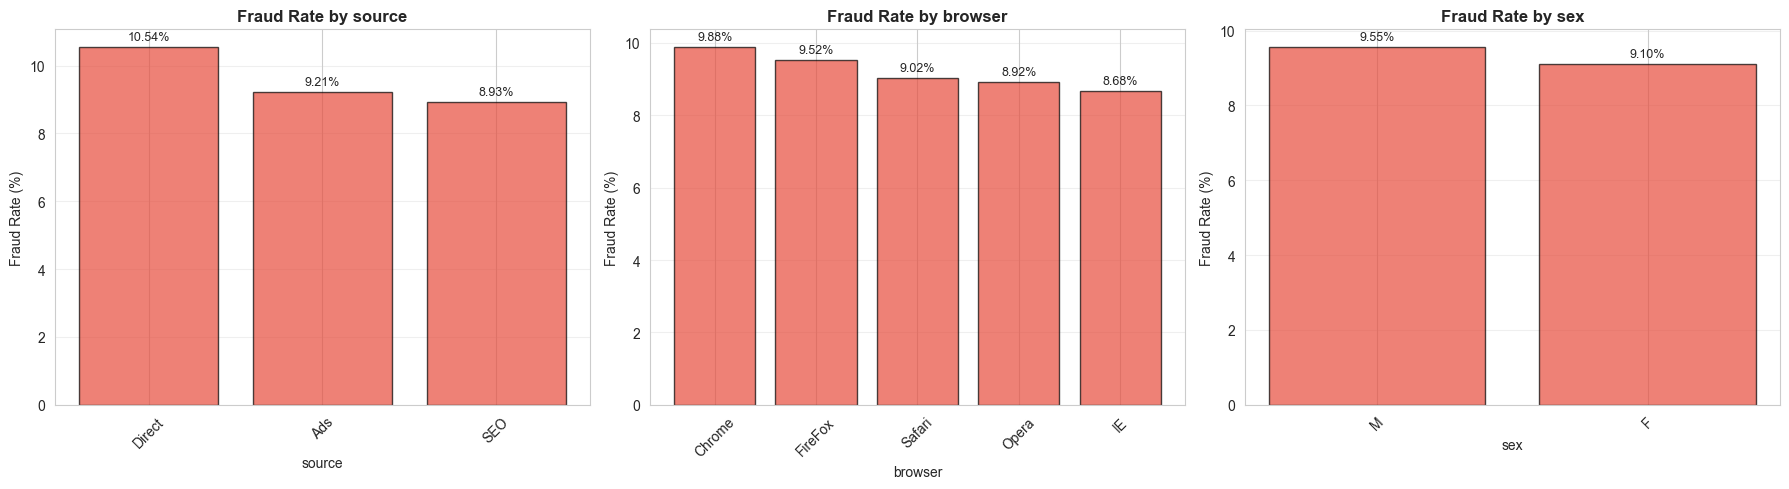

Fraud Rate by Category:

SOURCE:
source  total  fraud_count  fraud_rate  fraud_rate_pct
Direct  30616         3226    0.105370       10.536974
   Ads  59881         5513    0.092066        9.206593
   SEO  60615         5412    0.089285        8.928483


BROWSER:
browser  total  fraud_count  fraud_rate  fraud_rate_pct
 Chrome  61432         6069    0.098792        9.879216
FireFox  24610         2342    0.095165        9.516457
 Safari  24667         2225    0.090201        9.020148
  Opera   3676          328    0.089227        8.922742
     IE  36727         3187    0.086775        8.677540


SEX:
sex  total  fraud_count  fraud_rate  fraud_rate_pct
  M  88293         8434    0.095523        9.552286
  F  62819         5717    0.091007        9.100750



In [9]:
# Fraud rate analysis for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

categorical_features = ['source', 'browser', 'sex']

for idx, feature in enumerate(categorical_features):
    fraud_rate = df.groupby(feature)['class'].mean() * 100
    fraud_rate = fraud_rate.sort_values(ascending=False)
    
    axes[idx].bar(fraud_rate.index, fraud_rate.values, alpha=0.7, 
                  edgecolor='black', color='#e74c3c')
    axes[idx].set_title(f'Fraud Rate by {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Fraud Rate (%)')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels
    for i, v in enumerate(fraud_rate.values):
        axes[idx].text(i, v + max(fraud_rate.values)*0.02, f'{v:.2f}%', 
                      ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Detailed fraud rate table
print("Fraud Rate by Category:")
print("="*60)
for feature in categorical_features:
    fraud_stats = df.groupby(feature)['class'].agg(['count', 'sum', 'mean']).reset_index()
    fraud_stats.columns = [feature, 'total', 'fraud_count', 'fraud_rate']
    fraud_stats['fraud_rate_pct'] = fraud_stats['fraud_rate'] * 100
    fraud_stats = fraud_stats.sort_values('fraud_rate', ascending=False)
    print(f"\n{feature.upper()}:")
    print(fraud_stats.to_string(index=False))
    print()


## 10. Time-based Analysis


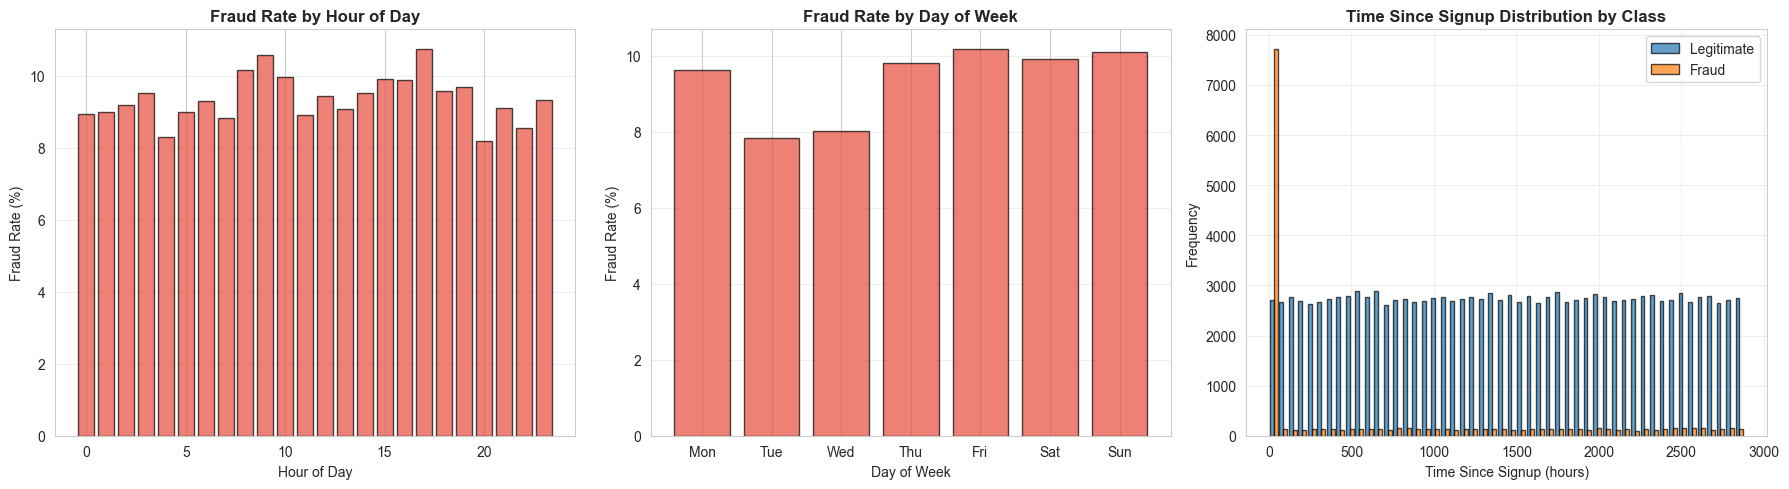

Time-based Fraud Analysis:

Average time since signup (Legitimate): 1441.99 hours
Average time since signup (Fraud): 673.29 hours


In [10]:
# Extract time features
df['hour_of_day'] = df['purchase_time'].dt.hour
df['day_of_week'] = df['purchase_time'].dt.dayofweek
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600  # in hours

# Fraud rate by hour of day
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hour of day
fraud_by_hour = df.groupby('hour_of_day')['class'].agg(['count', 'mean']).reset_index()
fraud_by_hour.columns = ['hour', 'count', 'fraud_rate']
fraud_by_hour['fraud_rate_pct'] = fraud_by_hour['fraud_rate'] * 100

axes[0].bar(fraud_by_hour['hour'], fraud_by_hour['fraud_rate_pct'], 
            alpha=0.7, edgecolor='black', color='#e74c3c')
axes[0].set_title('Fraud Rate by Hour of Day', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Fraud Rate (%)')
axes[0].grid(True, alpha=0.3, axis='y')

# Day of week
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fraud_by_day = df.groupby('day_of_week')['class'].agg(['count', 'mean']).reset_index()
fraud_by_day.columns = ['day', 'count', 'fraud_rate']
fraud_by_day['fraud_rate_pct'] = fraud_by_day['fraud_rate'] * 100

axes[1].bar([day_names[int(d)] for d in fraud_by_day['day']], 
            fraud_by_day['fraud_rate_pct'], alpha=0.7, edgecolor='black', color='#e74c3c')
axes[1].set_title('Fraud Rate by Day of Week', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].grid(True, alpha=0.3, axis='y')

# Time since signup distribution
axes[2].hist([df[df['class']==0]['time_since_signup'], 
              df[df['class']==1]['time_since_signup']], 
             bins=50, label=['Legitimate', 'Fraud'], alpha=0.7, edgecolor='black')
axes[2].set_title('Time Since Signup Distribution by Class', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Time Since Signup (hours)')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
print("Time-based Fraud Analysis:")
print("="*60)
print(f"\nAverage time since signup (Legitimate): {df[df['class']==0]['time_since_signup'].mean():.2f} hours")
print(f"Average time since signup (Fraud): {df[df['class']==1]['time_since_signup'].mean():.2f} hours")


## 11. Key Insights and Summary


In [11]:
print("="*80)
print("KEY INSIGHTS FROM EDA")
print("="*80)

print(f"\n1. Dataset Size: {len(df):,} transactions")
print(f"2. Class Imbalance: {class_counts[0]/class_counts[1]:.2f}:1 (Legitimate:Fraud)")
print(f"   - Legitimate: {class_percentages[0]:.2f}%")
print(f"   - Fraudulent: {class_percentages[1]:.2f}%")

print(f"\n3. Missing Values: {df.isnull().sum().sum()} total missing values")
print(f"4. Duplicates: {df.duplicated().sum()} duplicate rows")

print(f"\n5. Purchase Value Statistics:")
print(f"   - Legitimate transactions: ${df[df['class']==0]['purchase_value'].mean():.2f} average")
print(f"   - Fraudulent transactions: ${df[df['class']==1]['purchase_value'].mean():.2f} average")

print(f"\n6. Age Statistics:")
print(f"   - Legitimate: {df[df['class']==0]['age'].mean():.1f} years average")
print(f"   - Fraudulent: {df[df['class']==1]['age'].mean():.1f} years average")

print(f"\n7. Time Analysis:")
print(f"   - Average time since signup (Legitimate): {df[df['class']==0]['time_since_signup'].mean():.2f} hours")
print(f"   - Average time since signup (Fraud): {df[df['class']==1]['time_since_signup'].mean():.2f} hours")

print("\n" + "="*80)


KEY INSIGHTS FROM EDA

1. Dataset Size: 151,112 transactions
2. Class Imbalance: 9.68:1 (Legitimate:Fraud)
   - Legitimate: 90.64%
   - Fraudulent: 9.36%

3. Missing Values: 0 total missing values
4. Duplicates: 0 duplicate rows

5. Purchase Value Statistics:
   - Legitimate transactions: $36.93 average
   - Fraudulent transactions: $36.99 average

6. Age Statistics:


   - Legitimate: 33.1 years average


   - Fraudulent: 33.3 years average

7. Time Analysis:
   - Average time since signup (Legitimate): 1441.99 hours
   - Average time since signup (Fraud): 673.29 hours

